In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
pd.set_option('display.max_columns', None)
import networkx as nx


In [ ]:
!pip install fuzzywuzzy[speedup]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.0 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import process


In [ ]:
df_contratados = pd.read_csv('/content/drive/MyDrive/grafos/df_contratados.csv')

In [ ]:
# prompt: Usando o DataFrame df_contratados: edite a coluna cpf, retirando os pontos e -

# Removendo caracteres especiais da coluna CPF
df_contratados['CPF'] = df_contratados['CPF'].str.replace('.', '').str.replace('-', '')
df_contratados

,CPF,Servidor,Tipo de Cargo,Cargo,Data de admissão,Vantagens (Bruto)
0,***873964**,Agnes Morgana Galdino Tavares Alcantara,Contratação por excepcional interesse público,Agente de Credito,2023-11-01 00:00:00.000,5160.00
1,***493154**,Alan Davi Souza Bezerra,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,2023-11-01 00:00:00.000,2640.00
2,***692504**,Alana Fernanda Dias Carvalho,Função de confiança,Presidente,2021-01-02 00:00:00.000,156744.41
3,***453994**,Alison Barbosa da Silva,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,2023-11-01 00:00:00.000,2640.00
4,***583824**,Antonio Firmino Neto de Lima,Contratação por excepcional interesse público,Assistente Administrativo,2022-01-01 00:00:00.000,23053.00
...,...,...,...,...,...,...
8027,***110374**,Victor Arruda Camara Virgulino,Contratação por excepcional interesse público,Auxiliar de Ti,2023-10-01 00:00:00.000,4000.00
8028,***291654**,Vitor Alves Correia Lima Aquino,Contratação por excepcional interesse público,Analista de Desenvolvimento de Sistemas,2023-10-01 00:00:00.000,5520.00
8029,***418774**,Vitor Matheus Ribeiro Felix,Comissionado,Superintendente,2023-10-01 00:00:00.000,46720.80
8030,***638214**,Wanessa Isthewany de Albuquerque Wanderley,Contratação por excepcional interesse público,Supervisor de Estatistica,2023-10-01 00:00:00.000,5520.00


In [ ]:
def contrata_prefeitos(df_procurar):
  # comparando os recebedores do prefeito com os contratados
  common_names = []
  for i in df_contratados.index:
      nome_contratado = df_contratados.loc[i, 'Servidor'].upper().split()
      cpf_contratado = ''.join(c for c in df_contratados.loc[i, 'CPF'] if c.isdigit())
      for j in df_procurar.index:
          nome_politico = df_procurar.loc[j, 'NM_CONTRAPARTE'].upper().split()
          cpf_politico = ''.join(c for c in df_procurar.loc[j, 'NR_CPF_CNPJ_CONTRAPARTE'] if c.isdigit())
          common = set(nome_contratado) & set(nome_politico)
          if len(common) >= 2 and cpf_contratado in cpf_politico and nome_contratado[0] == nome_politico[0]:
              common_names.append(df_contratados.loc[i, 'Servidor'])
              break  # Move to the next contratado if a match is found
          elif nome_contratado == nome_politico:
              common_names.append(df_contratados.loc[i, 'Servidor'])
              break  # Move to the next contratado if a match is found

  # print(common_names)
  return common_names

In [ ]:
def limpa_df(df):
  df_nomes = df[(~df['NM_CONTRAPARTE'].str.contains('BANCO'))
  & (~df['NM_CONTRAPARTE'].str.contains('HOTEL'))
  & (~df['NM_CONTRAPARTE'].str.contains('COMBUSTIVEIS'))
  & (~df['NM_CONTRAPARTE'].str.contains('IMPRESSAO'))
  & (~df['NM_CONTRAPARTE'].str.contains('COMERCIO'))
  & (~df['NM_CONTRAPARTE'].str.contains('EMBALAGENS'))
  & (~df['NM_CONTRAPARTE'].str.contains('GRAFICA'))
  & (~df['NM_CONTRAPARTE'].str.contains('ENERGISA'))
  & (~df['NM_CONTRAPARTE'].str.contains('COPIADORA'))
  & (~df['NM_CONTRAPARTE'].str.contains('PUBLICIDADE'))
  & (~df['NM_CONTRAPARTE'].str.contains('PARTIDO'))
  & (~df['NM_CONTRAPARTE'].str.contains('PLASTICOS'))
  & (~df['NM_CONTRAPARTE'].str.contains('PRODUCOES'))
  & (~df['NM_CONTRAPARTE'].str.contains('MARKETING'))
  & (~df['NM_CONTRAPARTE'].str.contains('CONSULTORES'))
  & (~df['NM_CONTRAPARTE'].str.contains('ASSOCIADOS'))
  & (~df['NM_CONTRAPARTE'].str.contains('SECRETARIA'))
  & (~df['NM_CONTRAPARTE'].str.contains('PRODUTORA'))
  & (~df['NM_CONTRAPARTE'].str.contains('LTDA'))
  & (~df['NM_CONTRAPARTE'].str.contains('EIRELLI'))
  & (~df['NM_CONTRAPARTE'].str.contains('EIRELI'))
  & (~df['NM_CONTRAPARTE'].str.contains('00000000000000000000000000000000000000000000000000'))
  & (~df['NM_CONTRAPARTE'].str.contains('#NULO#'))
  & (~df['NM_CONTRAPARTE'].str.contains((df['NM_PRESTADOR_CONTA'].iloc[0])))
  & (~df['NM_CONTRAPARTE'].str.contains('INFORMADO'))
  & (~df['NM_CONTRAPARTE'].str.contains('BANCARIA'))
  & (~df['NM_CONTRAPARTE'].str.contains('COMUNICACAO'))
  & (~df['NM_CONTRAPARTE'].str.contains('REPUBLICANOS'))
  & (~df['NM_CONTRAPARTE'].str.contains('DEMOCRATAS'))
  & (~df['NM_CONTRAPARTE'].str.contains('CAIXA'))
  & (~df['NM_CONTRAPARTE'].str.contains('DEVOLUCAO'))
  & (~df['NM_CONTRAPARTE'].str.contains('RECUPERACAO'))
  & (~df['NM_CONTRAPARTE'].str.contains('MESMO TITULAR'))
  & (~df['NM_CONTRAPARTE'].str.contains('BOLETO'))
  & (~df['NM_CONTRAPARTE'].str.contains('CAGEPA'))
  ].copy()

  unique_counterparties = df_nomes['NM_CONTRAPARTE'].unique()

  # Use a list comprehension to iterate over the list and apply the regex substitution
  unique_counterparties_no_numbers = [re.sub(r'\d+', '', item) for item in unique_counterparties]

  # Apply the regex substitution to the 'Name' column
  df_nomes['NM_CONTRAPARTE'] = df_nomes['NM_CONTRAPARTE'].apply(lambda x: re.sub(r'\d+', '', x))

  # Replace hyphens with empty strings in the 'Name' column
  df_nomes['NM_CONTRAPARTE'] = df_nomes['NM_CONTRAPARTE'].str.replace('-', '')

  df_nomes_baixar = df_nomes[['NR_CPF_CNPJ_CONTRAPARTE', 'NM_CONTRAPARTE']].copy()

  df_unique = df_nomes_baixar.drop_duplicates(subset='NM_CONTRAPARTE')

  return df_unique

__________________________________________________

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/grafos/extrato_bancario_candidato_2020/extrato_bancario_candidato_2020.csv",
                 encoding="latin1",  on_bad_lines='skip', sep=';', quotechar='"', low_memory=False)

In [ ]:
def cria_gf(nomePolitico):
  df_politico = df[df['NM_PRESTADOR_CONTA'].str.contains(nomePolitico.upper())]

  # gerar grafo a partir desse
  df_politico_baixar = limpa_df(df_politico)
  df_politico_baixar


  l_politico = contrata_prefeitos(df_politico_baixar)


  # ligar ao politico a partir desse
  df_pag_politico = df_contratados[df_contratados['Servidor'].isin(l_politico)].copy()
  df_pag_politico['Relacionado'] = nomePolitico
  df_pag_politico
  df_pag_politico = df_pag_politico[df_pag_politico['Servidor'] != nomePolitico]
  df_pag_politico_sem_duplicatas = df_pag_politico.drop_duplicates(subset='CPF')

  # print(df_pag_politico_sem_duplicatas)

  # cria grafo e adiciona politico e municipio
  G = nx.Graph()
  G.add_node(nomePolitico, nome = nomePolitico)
  G.add_node('MUNICIPIO', nome = 'MUNICIPIO')


  # roda para criar os vertices possiveis
  for _, row in df_politico_baixar.iterrows():
    if row['NM_CONTRAPARTE'].upper().rstrip() not in G.nodes() and row['NM_CONTRAPARTE'] != 'GRACIETE FELIPE DOS SANTOS':
      G.add_node(row['NM_CONTRAPARTE'].upper().rstrip(), nome = row['NM_CONTRAPARTE'].upper().rstrip())


  # roda para ligar os que receberam do politico
  for _, row in df_politico_baixar.iterrows():
    G.add_edge(row['NM_CONTRAPARTE'].upper().rstrip(), nomePolitico)


  # roda para ligar os que trabalham no municipio
  for _, row in df_pag_politico_sem_duplicatas.iterrows():
    if row['Servidor'].upper().rstrip() in G.nodes():
      G.add_edge(row['Servidor'].upper().rstrip(), 'MUNICIPIO')
    else:
      # Encontrar o nó com nome mais similar
      nos_similares = process.extract(row['Servidor'].upper().rstrip(), G.nodes(), limit=1)
      if nos_similares and nos_similares[0][1] > 80:  # Ajuste o limiar de similaridade conforme necessário
        print("Value of nos_similares[0]:", nos_similares[0])  # Print the value
        G.add_edge(nos_similares[0][2], 'MUNICIPIO')

  print("\n\n\n")
  print("qtd_pessoas total: ", len(list(G.neighbors(nomePolitico))))
  print(G.nodes())
  print("qtd_pessoas mun: ", len(list(G.neighbors('MUNICIPIO'))))
  print(list(G.neighbors('MUNICIPIO')))

  return G

In [ ]:
df_eva = df[df['NM_PRESTADOR_CONTA'].str.contains('EVA ELIANA RAMOS GOUVEIA'.upper())]
df_eva

,DT_GERACAO,HH_GERACAO,AA_REFERENCIA,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO_PRESTADOR_CONTA,NM_PRESTADOR_CONTA,SG_PARTIDO,NM_ESFERA,TP_PESSOA,DS_LANCAMENTO,DT_LANCAMENTO,NR_DOCUMENTO,TP_LANCAMENTO,TP_OPERACAO,NM_OPERACAO,CD_BANCO,NM_BANCO,NR_AGENCIA,NR_CONTA,TP_CONTA,VR_LANCAMENTO,CD_BANCO_CONTRAPARTE,NM_BANCO_CONTRAPARTE,NR_AGENCIA_CONTRAPARTE,NR_CONTA_CONTRAPARTE,NR_CPF_CNPJ_CONTRAPARTE,NM_CONTRAPARTE,CD_FONTE_RECURSO,NM_FONTE_RECURSO,DS_DETALHE_FONTE_RECURSO
47239,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,1,TRANSFERENCIA RECEBIDA,12/11/2020,605026000014989,C,213,TRANSFERÊNCIA ENTRE CONTAS,1,BCO BRASIL,8101,124176,1,"2500,00",1,BCO BRASIL,5026,00000000000000149896,54876990468,EVA ELIANA RAMOS GOUVEIA,1,Outros Recursos,OR
79361,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,2,TRANSFERENCIA ENVIADA,13/10/2020,555892000040609,D,117,TRANSFERÊNCIA ENTRE CONTAS,1,BCO BRASIL,8101,124176,1,"1800,00",1,BCO BRASIL,5892,00000000000000406090,22763480000185,GRAFICA E EDITORA JOTTA LTDA - ME,1,Outros Recursos,OR
124765,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,-1,PAGAMENTO DE BOLETO,09/11/2020,000000000110902,D,104,LANÇAMENTO AVISADO,1,BCO BRASIL,8101,124176,1,"800,00",748,BANCO COOPERATIVO SICREDI SA,-1,#NULO#,-1,TITULO - OUTRO BANCO: BANCO COOPERATIVO SICRED...,1,Outros Recursos,OR
326567,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,1,TRANSFERENCIA RECEBIDA,02/10/2020,603331000060328,C,213,TRANSFERÊNCIA ENTRE CONTAS,1,BCO BRASIL,8101,124176,1,"13600,00",1,BCO BRASIL,3331,00000000000000603287,20415419468,CLEONICE DA COSTA BARROSO,1,Outros Recursos,OR
586084,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,1,TRANSFERENCIA RECEBIDA,02/10/2020,603331000090952,C,213,TRANSFERÊNCIA ENTRE CONTAS,1,BCO BRASIL,8101,124176,1,"1400,00",1,BCO BRASIL,3331,00000000000000909521,06221468400,ROBSON RAMOS GOUVEIA,1,Outros Recursos,OR
900301,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,2,TRANSFERENCIA RECEBIDA,14/10/2020,551636000062139,C,213,TRANSFERÊNCIA ENTRE CONTAS,1,BCO BRASIL,8101,124184,1,"27000,00",1,BCO BRASIL,1636,00000000000000621390,14804182000168,PARTIDO SOCIAL DEMOCRATICO-PSD,2,Fundo Especial de Financiamento de Campanha,FEFC
990056,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,-1,PAGAMENTO DE BOLETO,12/11/2020,000000000111203,D,104,LANÇAMENTO AVISADO,1,BCO BRASIL,8101,124176,1,"108,90",341,ITA? UNIBANCO S.A.,-1,#NULO#,-1,TITULO - OUTRO BANCO: ITAU UNIBANCO S.A.,1,Outros Recursos,OR
1062108,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,2,PAGAMENTO CONTA AGUA,29/10/2020,000000000102901,D,104,LANÇAMENTO AVISADO,1,BCO BRASIL,8101,124184,1,"161,07",1,BCO BRASIL,1618,00000000000000025984,09123654000187,COMPANHIA DE AGUA E ESGOTOS DA PARAIBA CAGEPA,2,Fundo Especial de Financiamento de Campanha,FEFC
1427111,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,1,TRANSFERENCIA RECEBIDA,10/11/2020,601591000007352,C,213,TRANSFERÊNCIA ENTRE CONTAS,1,BCO BRASIL,8101,124176,1,"500,00",1,BCO BRASIL,1591,00000000000000073520,03948673438,DIEGO GADELHA DE MENEZES,1,Outros Recursos,OR
1916246,05/08/2024,13:17:19,2020,38621622000100,VEREADOR,EVA ELIANA RAMOS GOUVEIA,PSD,#NULO#,2,TED TRANSF.ELETR.DISPONIVEL,03/11/2020,000000000110301,D,120,"TRANSF. INTERBANCÁRIA (DOC, TED)",1,BCO BRASIL,8101,124176,1,"2700,00",104,CAIXA ECONOMICA FEDERAL,41,00000000000000018180,12731675000190,CONSTRUTORA MARILLAC EIRELI,1,Outros Recursos,OR


In [ ]:
# gerar grafo a partir desse

df_eva_baixar = limpa_df(df_eva)
df_eva_baixar

,NR_CPF_CNPJ_CONTRAPARTE,NM_CONTRAPARTE
326567,20415419468,CLEONICE DA COSTA BARROSO
586084,06221468400,ROBSON RAMOS GOUVEIA
1427111,03948673438,DIEGO GADELHA DE MENEZES
2109507,05654784439,JOAO PAULO SPENCER DE ANDRADE FREIRE
2855411,03407476418,GENILDA GOUVEIA DA SILVA
3798408,00007853668490,ANDERSON WILSON SAMPAIO SANTOS
3970539,15710469000191,VALBERTO F A






qtd_pessoas total:  7
['EVA ELIANA RAMOS GOUVEIA', 'MUNICIPIO', 'CLEONICE DA COSTA BARROSO', 'ROBSON RAMOS GOUVEIA', 'DIEGO GADELHA DE MENEZES', 'JOAO PAULO SPENCER DE ANDRADE FREIRE', 'GENILDA GOUVEIA DA SILVA', 'ANDERSON WILSON SAMPAIO SANTOS', 'VALBERTO F A']
qtd_pessoas mun:  1
['CLEONICE DA COSTA BARROSO']


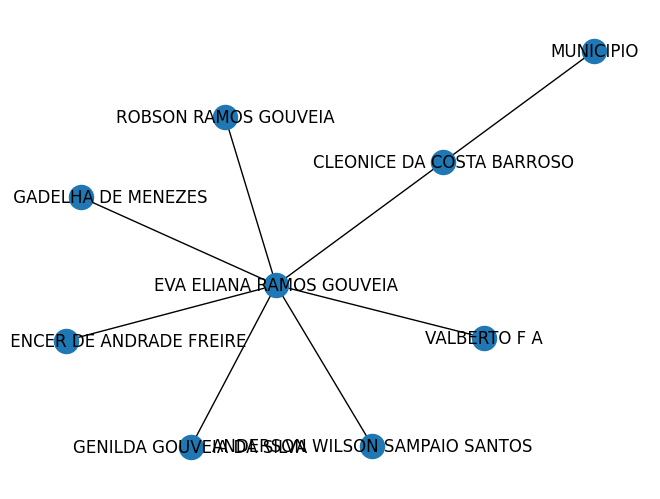

In [ ]:
grafo_eva = cria_gf('EVA ELIANA RAMOS GOUVEIA')
pos = nx.kamada_kawai_layout(grafo_eva)
nx.draw(grafo_eva, pos, with_labels=True)

# nx.write_graphml(grafo_eva, "grafo_eva.graphml")
# from google.colab import files
# files.download('grafo_eva.graphml')





qtd_pessoas total:  3
['IVONETE ALMEIDA DE ANDRADE LUDGERIO', 'MUNICIPIO', 'ABRAAO MARQUES DA COSTA', 'LEONARDO OLIVEIRA LIRA', 'MARIA G ARAUJO NOBREGA']
qtd_pessoas mun:  0
[]


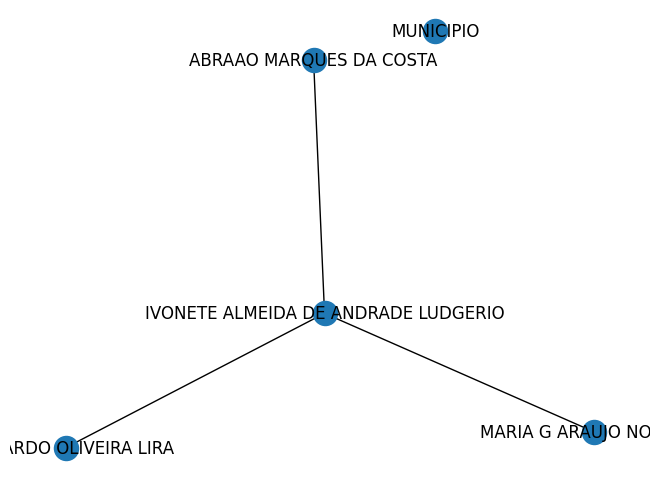

In [ ]:
grafo_ivonete = cria_gf('IVONETE ALMEIDA DE ANDRADE LUDGERIO')
pos = nx.kamada_kawai_layout(grafo_ivonete)
nx.draw(grafo_ivonete, pos, with_labels=True)

# nx.write_graphml(grafo_ivonete, "grafo_ivonete.graphml")
# from google.colab import files
# files.download('grafo_ivonete.graphml')





qtd_pessoas total:  2
['FABIANA CAMÊLO DA SILVA', 'MUNICIPIO', 'LEANDRO SANTIAGO DA SILVA', 'GERMANA DE SOUSA SILVA']
qtd_pessoas mun:  1
['GERMANA DE SOUSA SILVA']


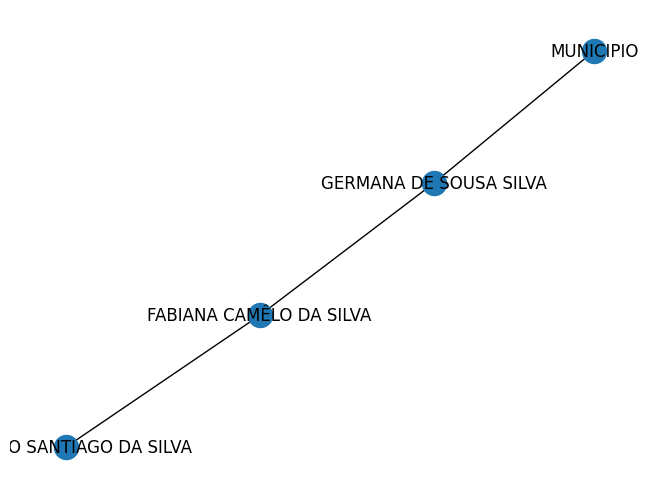

In [ ]:
grafo_fabiana = cria_gf('FABIANA CAMÊLO DA SILVA')
pos = nx.kamada_kawai_layout(grafo_fabiana)
nx.draw(grafo_fabiana, pos, with_labels=True)

# nx.write_graphml(grafo_fabiana, "grafo_fabiana.graphml")
# from google.colab import files
# files.download('grafo_fabiana.graphml')





qtd_pessoas total:  11
['ALEXANDRE PEREIRA DA SILVA', 'MUNICIPIO', 'RICARDO MARTINS ARAUJO PINHO', 'MANOEL FRUTUOSO DE LIMA', 'FABIANA M VIEIRA ME', 'PAULO GUILHERME CELESTINO', 'MARONIO MONTEIRO DO REGO', 'JESSICA APARECIDA DA SILVA ROCHA', 'LUCIANO SOUZA GONCALVES', 'VALDY FERREIRA DE MENEZES', 'ANA CARLA BARBOSA', 'JOCIMAR MOACIR CAPPELLETTI', 'MARIA C']
qtd_pessoas mun:  0
[]


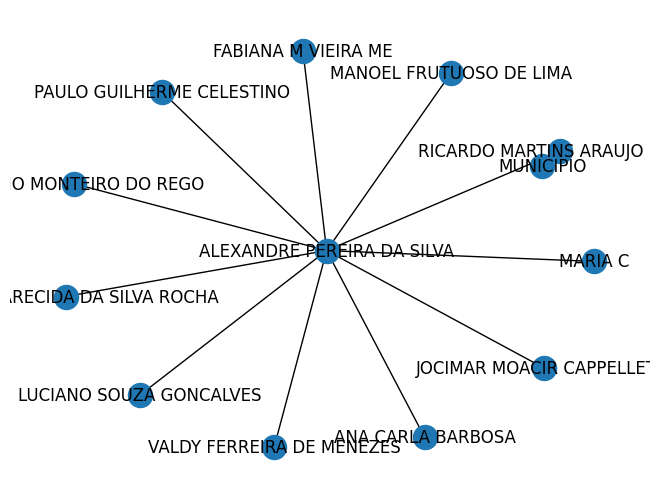

In [ ]:
grafo_alexandre = cria_gf('ALEXANDRE PEREIRA DA SILVA')
pos = nx.kamada_kawai_layout(grafo_alexandre)
nx.draw(grafo_alexandre, pos, with_labels=True)

# nx.write_graphml(grafo_alexandre, "grafo_alexandre.graphml")
# from google.colab import files
# files.download('grafo_alexandre.graphml')





qtd_pessoas total:  2
['JOSÉ ALDO CABRAL PEREIRA', 'MUNICIPIO', 'JOSE LUIS DE SOUZA', 'JOSE ALDO CABRAL PEREIRA']
qtd_pessoas mun:  2
['JOSE LUIS DE SOUZA', 'JOSE ALDO CABRAL PEREIRA']


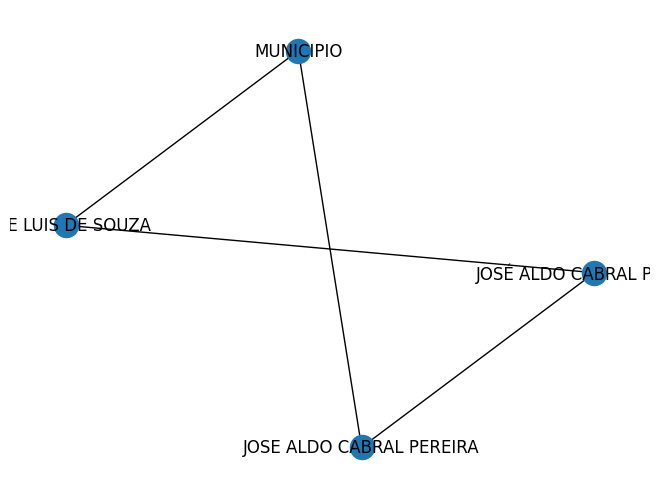

In [ ]:
grafo_cabral = cria_gf('JOSÉ ALDO CABRAL PEREIRA')
pos = nx.kamada_kawai_layout(grafo_cabral)
nx.draw(grafo_cabral, pos, with_labels=True)

# nx.write_graphml(grafo_cabral, "grafo_cabral.graphml")
# from google.colab import files
# files.download('grafo_cabral.graphml')





qtd_pessoas total:  5
['JOSILENE MARIA DE OLIVEIRA', 'MUNICIPIO', 'LUCAS CARDOSO PEREIRA', 'CARLOS RENE PINHEIRO', 'LUCIANA LEANDRO DA SILVA', 'ALBANITA ALMEIDA TOMAZ', 'JOSE MARIA DUARTE MOURA NETO']
qtd_pessoas mun:  0
[]


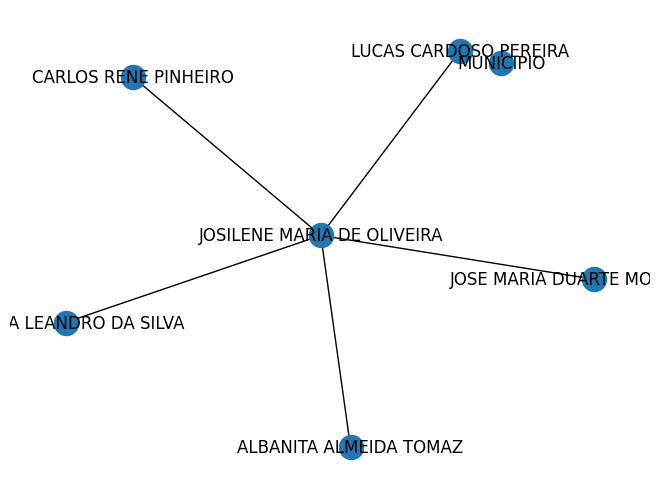

In [ ]:
grafo_josilene = cria_gf('JOSILENE MARIA DE OLIVEIRA')
pos = nx.kamada_kawai_layout(grafo_josilene)
nx.draw(grafo_josilene, pos, with_labels=True)

# nx.write_graphml(grafo_josilene, "grafo_josilene.graphml")
# from google.colab import files
# files.download('grafo_josilene.graphml')





qtd_pessoas total:  2
['AFONSO DA SILVA AVELINO', 'MUNICIPIO', 'ADEILSON DE SOUSA SILVA', 'DANIELLY FARIAS DA SILVA MEDEIROS']
qtd_pessoas mun:  0
[]


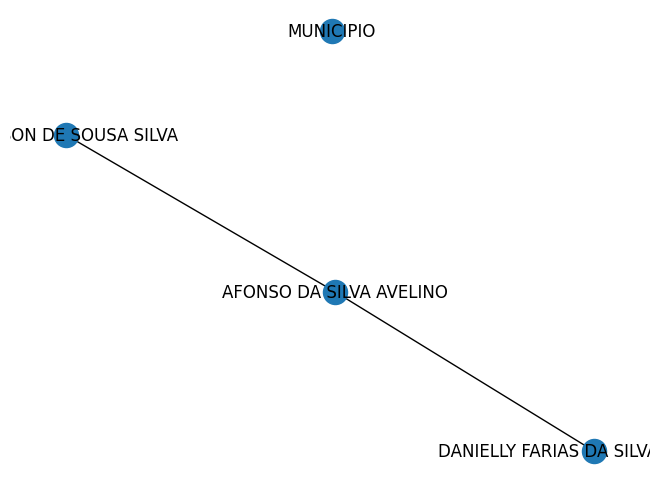

In [ ]:
grafo_rui_da_ceasa = cria_gf('AFONSO DA SILVA AVELINO')
pos = nx.kamada_kawai_layout(grafo_rui_da_ceasa)
nx.draw(grafo_rui_da_ceasa, pos, with_labels=True)

# nx.write_graphml(grafo_rui_da_ceasa, "grafo_rui_da_ceasa.graphml")
# from google.colab import files
# files.download('grafo_rui_da_ceasa.graphml')





qtd_pessoas total:  10
['VALÉRIA SILVA ARAGÃO', 'MUNICIPIO', 'HELOISA FERNANDA S ARAGAO', 'ANNA CAROLINE F ARAGAO', 'ELAINE CRISTINA OLIVEIRA BE', 'MARIA JOSE MENEZES', 'LUCIANNE MORAES BARROS EPP', 'VANESSA BATISTA DE SOUSA SILVA', 'ELOISA FERNANDA SILVA ARAGAO', 'PEDRO MARIO FREITAS ALVES FERNANDES', 'MARIA LUIZA SILVA ARAGAO', 'FERNANDO SCHRAMM']
qtd_pessoas mun:  0
[]


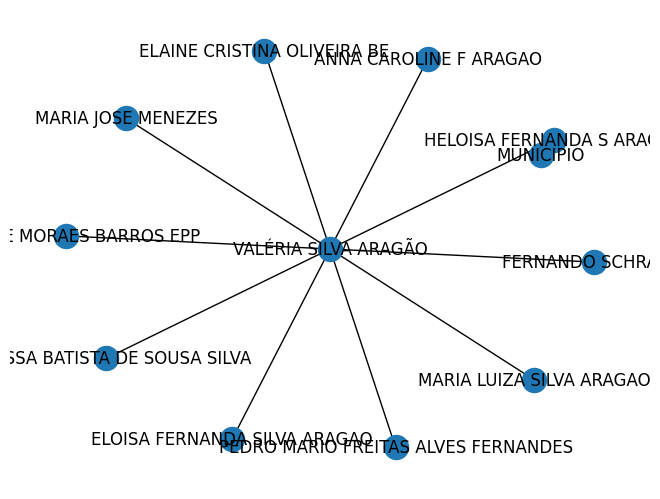

In [ ]:
grafo_valeria = cria_gf('VALÉRIA SILVA ARAGÃO')
pos = nx.kamada_kawai_layout(grafo_valeria)
nx.draw(grafo_valeria, pos, with_labels=True)

# nx.write_graphml(grafo_valeria, "grafo_valeria.graphml")
# from google.colab import files
# files.download('grafo_valeria.graphml')





qtd_pessoas total:  5
['JOSE MARINALDO CARDOSO', 'MUNICIPIO', 'ANA KARLA COSTA SILVEIRA', 'CARLOS OMAR DE LIMA GOMES', 'JOSE LUIS DE SOUZA', 'HELENA PEREIRA DE SOUSA', 'DIOGO FREIRE COSTA']
qtd_pessoas mun:  3
['JOSE LUIS DE SOUZA', 'ANA KARLA COSTA SILVEIRA', 'DIOGO FREIRE COSTA']


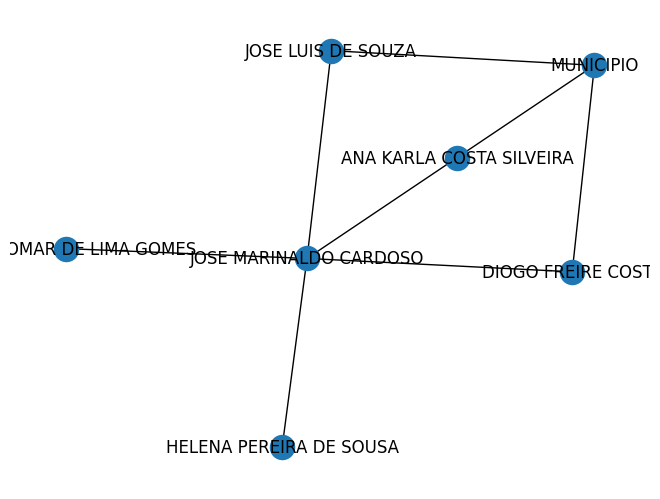

In [ ]:
grafo_marinaldo = cria_gf('JOSE MARINALDO CARDOSO')
pos = nx.kamada_kawai_layout(grafo_marinaldo)
nx.draw(grafo_marinaldo, pos, with_labels=True)

# nx.write_graphml(grafo_marinaldo, "grafo_marinaldo.graphml")
# from google.colab import files
# files.download('grafo_marinaldo.graphml')





qtd_pessoas total:  4
['CLEDSON RODRIGUES DA SILVA', 'MUNICIPIO', 'DANIEL OLIVEIRA NERY', 'ROSTAND RAMALHO PEREIRA', 'MARCILIO FLAVIO FLORIANO BRAGA', 'LENILSON COSTA DE MACEDO']
qtd_pessoas mun:  1
['MARCILIO FLAVIO FLORIANO BRAGA']


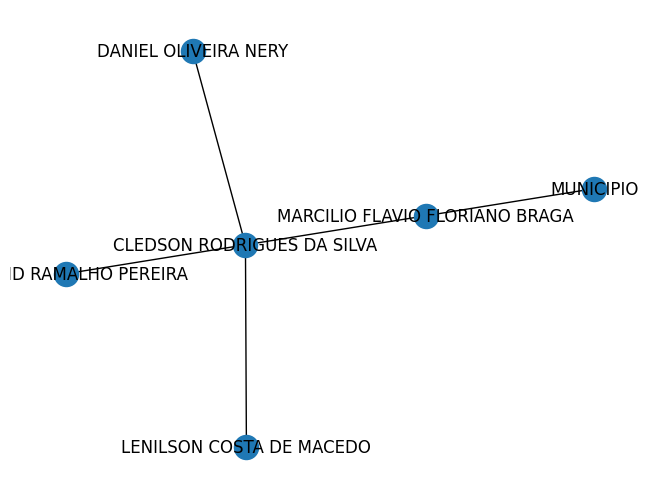

In [ ]:
grafo_dinho_papaleguas = cria_gf('CLEDSON RODRIGUES DA SILVA')
pos = nx.kamada_kawai_layout(grafo_dinho_papaleguas)
nx.draw(grafo_dinho_papaleguas, pos, with_labels=True)

# nx.write_graphml(grafo_dinho_papaleguas, "grafo_dinho_papaleguas.graphml")
# from google.colab import files
# files.download('grafo_dinho_papaleguas.graphml')

Value of nos_similares[0]: ({'nome': 'DIEGO RENIER SOARES FALCAO'}, 86, 'DIEGO RENIER SOARES FALCAO')




qtd_pessoas total:  78
['BRUNO CUNHA LIMA', 'MUNICIPIO', 'EDSON FERNANDO DE QUEIROZ BARBOSA', 'NARCISO VIRGINIO GUIMARAES', 'ANDREZA GOMES RANGEL', 'CHARLES MASSENA ALVES', 'RAWIDE HICARO DE MELO ALVES', 'CINTYA FERREIRA SILVEIRA GUIMARAES', 'DALTON ROBERTO BENEVIDES GADELHA', 'EMANUEL NASCIMENTO', 'IVANDRO MOURA CUNHA LIMA', 'MARIA DAS GRACAS DE ARAUJO NOBREGA', 'DEIVYSON NARCISO RODRIGUES', 'ISIS COELHO SOARES', 'E. A. O. MARREIRO', 'FRANCIMERE GUIMARAES CARNEIRO', 'GRAZZIANE SCAPELLI CAVALCANTE BORGES', 'CRISTIANE LARISSA FERNANDES MELO', 'EDUARDO DA SILVA BARBOSA ME', 'JUNOT LACET DE BARROS FILHO', 'JOSE RUAN GUIMARAES SOUZA', 'RICARDO ALEXANDRE NUNES PEREIRA', 'ANDERSON SOUSA HENRIQUE XAVIER', 'ANA LIGIA ALEXANDRE DA SILVA', 'RENATO ANDERSON LIMA DE OLIVEIRA', 'LUCIANNE MORAES DE BARROS', 'BRUNNA WALESKA MARINHO DE ALMEIDA', 'DESSANA DE ARAUJO E SILVA OLIVEIRA SOBRA', 'BRUNO M

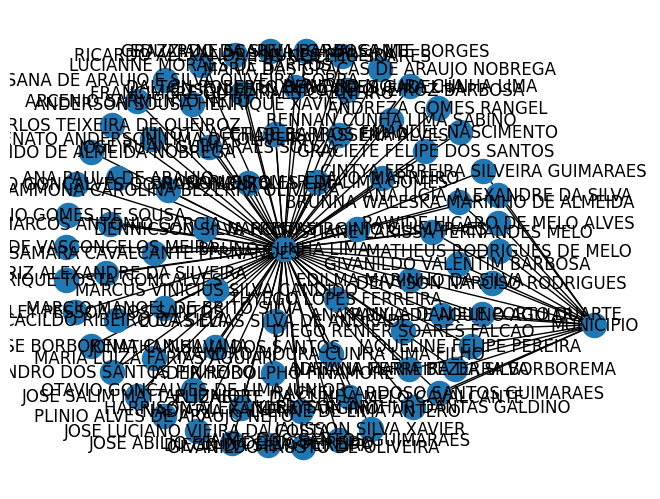

In [ ]:
grafo_bruno = cria_gf('BRUNO CUNHA LIMA')
pos = nx.kamada_kawai_layout(grafo_bruno)
nx.draw(grafo_bruno, pos, with_labels=True)

# nx.write_graphml(grafo_bruno, "grafo_bruno.graphml")
# from google.colab import files
# files.download('grafo_bruno.graphml')

Value of nos_similares[0]: ({'nome': 'RAFAELA VANESKA DO N SILVA'}, 83, 'RAFAELA VANESKA DO N SILVA')




qtd_pessoas total:  9
['LUCAS RIBEIRO NOVAIS', 'MUNICIPIO', 'INACIO KLEBER RODRIGUES DE LUNA', 'RAFAELA VANESKA DO N SILVA', 'EL  LUCIANO BRENO CHAVE  FEFC', 'ROBSON VIEIRA DE ARAUJO', 'EL  ITAMAR ALVES DOS SA  FEFC', 'EL  VAGNER PEREIRA DE M  FEFC', 'EL  FABRICIO CUNHA MEND  FEFC', 'EL  LAELSON PATRICIO LI  FEFC', 'EL  EDUARDO ANTONIO COS  FEFC']
qtd_pessoas mun:  1
['RAFAELA VANESKA DO N SILVA']


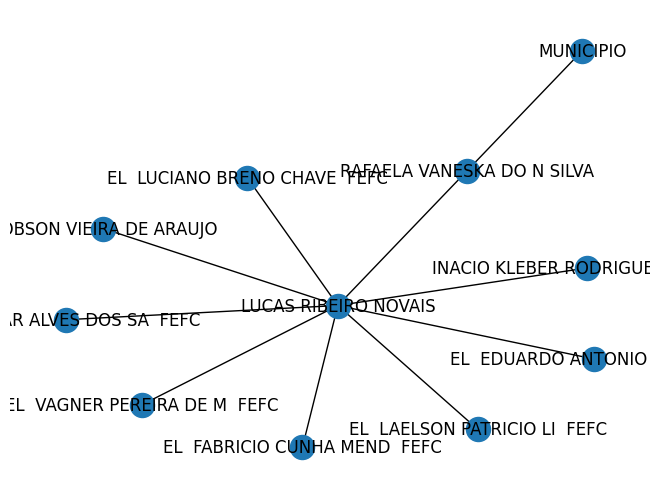

In [ ]:
grafo_lucas = cria_gf('LUCAS RIBEIRO NOVAIS')
pos = nx.kamada_kawai_layout(grafo_lucas)
nx.draw(grafo_lucas, pos, with_labels=True)

# nx.write_graphml(grafo_lucas, "grafo_lucas.graphml")
# from google.colab import files
# files.download('grafo_lucas.graphml')